In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising_Sales.csv')
df

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### Handling Null Values

In [3]:
df.isnull().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(200, 5)

In [6]:
df.columns

Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

In [7]:
df['Unnamed: 0'].value_counts()

Unnamed: 0
1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: count, Length: 200, dtype: int64

In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

In [10]:
df.describe()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Separate Cat and cont columns

In [11]:
num_cols = df.dtypes[df.dtypes!='object'].index
cat_cols = df.dtypes[df.dtypes=='object'].index
print(num_cols)
print(cat_cols)

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')
Index([], dtype='object')


#### all the columns in the data are cont columns

### EDA
#### Univariate Analysis 

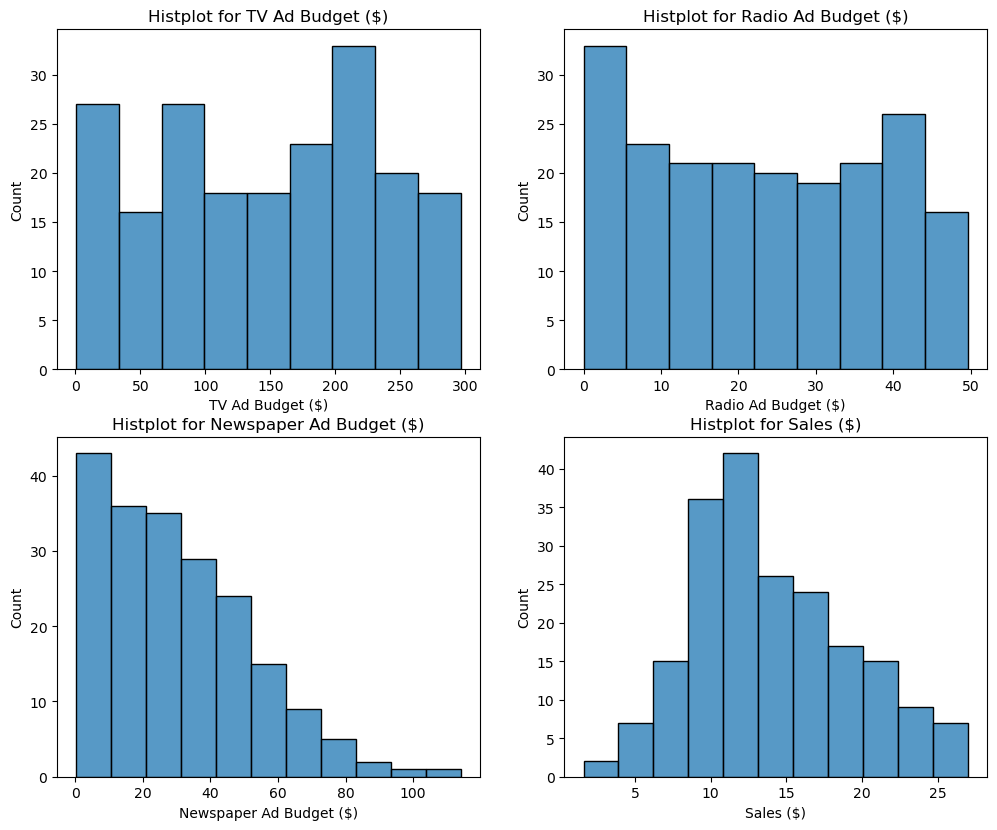

In [12]:
cols  = num_cols
cols = num_cols
plt.figure(figsize=(12,15))
for i in range(len(cols)):  # i = 0,1,2,3,4,5
    plt.subplot(3,2,i+1)
    sns.histplot(x=df[cols[i]])
    plt.title(f'Histplot for {cols[i]}')
plt.show()

### Bi-Variate Analysis

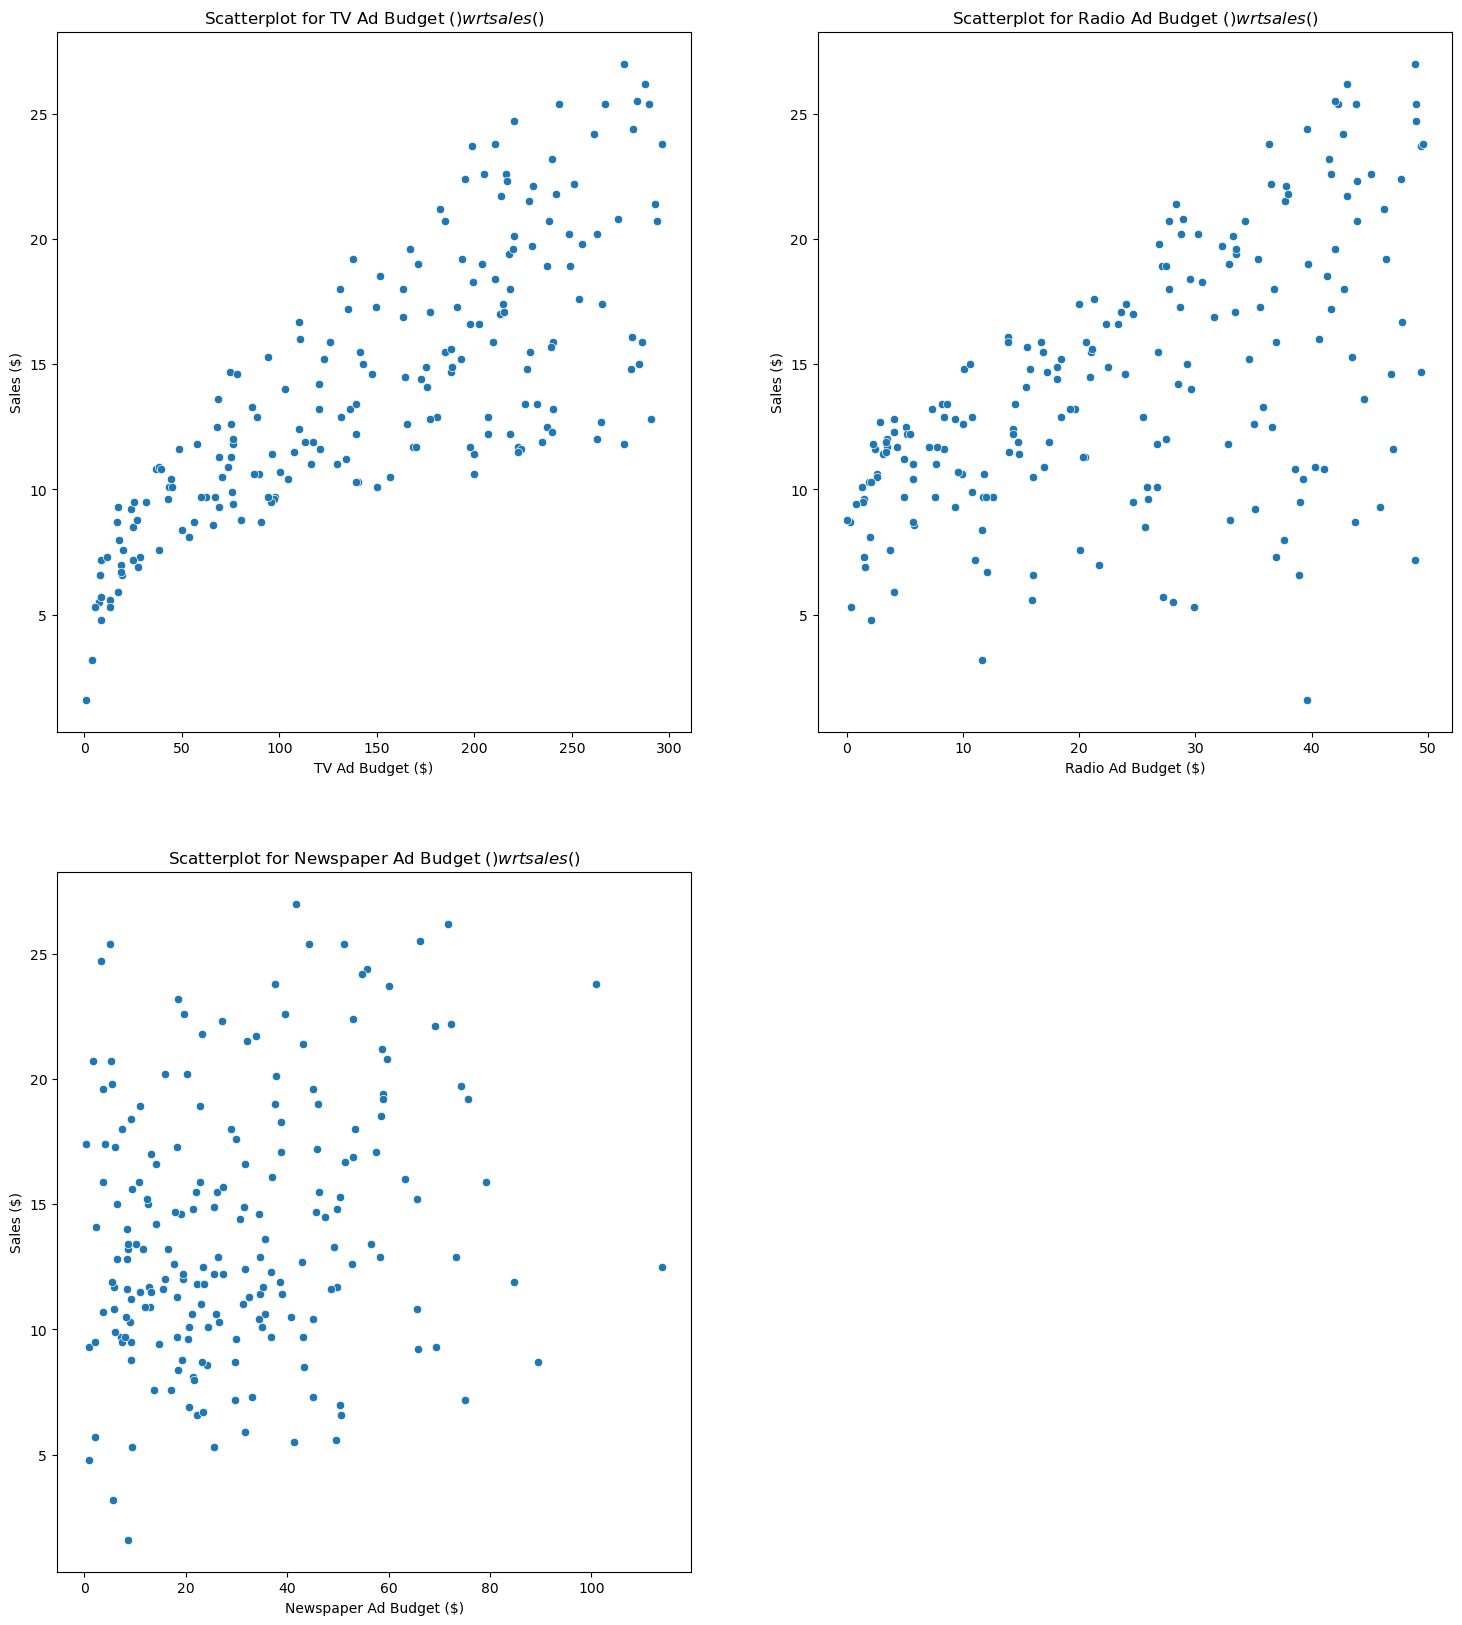

In [13]:
cols = num_cols[:-1]
plt.figure(figsize=(18,20))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=df[cols[i]],y=df['Sales ($)'])
    plt.title(f'Scatterplot for {cols[i]} wrt sales($)')
plt.show()



### Correlation

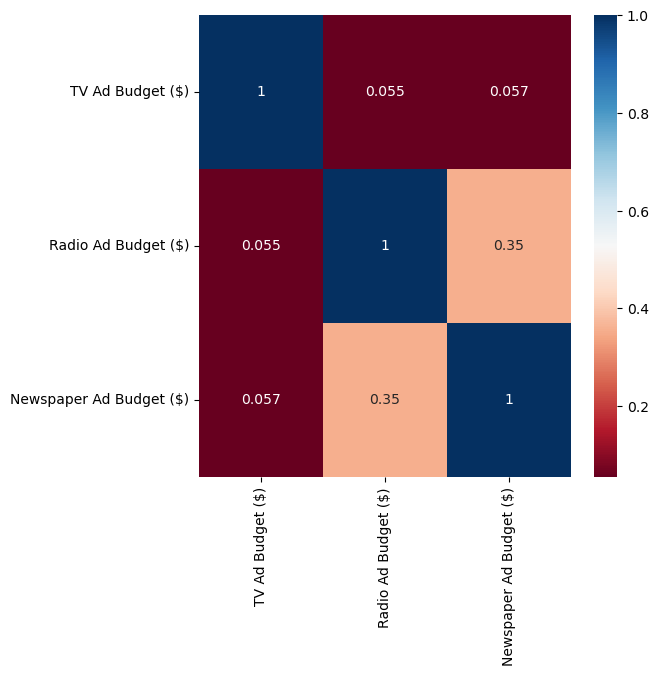

In [14]:
corr = df[num_cols[:-1]].corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()


### Outlier Treatment

In [15]:
a1 = df[num_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,5%,50%,95%,98%,99%,max
TV Ad Budget ($),0.7,5.387,7.790,13.195,149.75,280.735,289.720,292.907,296.4
Radio Ad Budget ($),0.0,0.399,1.290,1.995,22.90,46.810,49.000,49.400,49.6
Newspaper Ad Budget ($),0.3,0.999,1.798,3.600,25.75,71.825,79.312,89.515,114.0
Sales ($),1.6,4.784,5.300,6.600,12.90,23.800,25.400,25.507,27.0


In [16]:
for i in num_cols:
    upper = df[i].quantile(0.99)
    print(i,upper,'Count of outliers: ',df[df[i]>upper].shape[0])

TV Ad Budget ($) 292.907 Count of outliers:  2
Radio Ad Budget ($) 49.4 Count of outliers:  1
Newspaper Ad Budget ($) 89.5149999999999 Count of outliers:  2
Sales ($) 25.506999999999994 Count of outliers:  2


In [17]:
for i in num_cols:
    upper = df[i].quantile(0.99)
    df[i] = np.where(df[i]>upper,upper,df[i])

In [18]:
for i in num_cols:
    lower = df[i].quantile(0.01)
    print(i,upper,'Count of outliers: ',df[df[i]<lower].shape[0])

TV Ad Budget ($) 25.506999999999994 Count of outliers:  2
Radio Ad Budget ($) 25.506999999999994 Count of outliers:  2
Newspaper Ad Budget ($) 25.506999999999994 Count of outliers:  2
Sales ($) 25.506999999999994 Count of outliers:  2


In [19]:
for i in num_cols:
    lower = df[i].quantile(0.01)
    df[i] = np.where(df[i]<lower,lower,df[i])

In [20]:
df1 = df.copy()

In [21]:
a1 = df[num_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,5%,50%,95%,98%,99%,max
TV Ad Budget ($),5.387,5.39987,7.790,13.195,149.75,280.735,289.720,292.90007,292.907
Radio Ad Budget ($),0.399,0.39999,1.290,1.995,22.90,46.810,49.000,49.40000,49.400
Newspaper Ad Budget ($),0.999,0.99999,1.798,3.600,25.75,71.825,79.312,89.40115,89.515
Sales ($),4.784,4.79984,5.300,6.600,12.90,23.800,25.400,25.50007,25.507


In [22]:
x = num_cols[:-1]
y = df['Sales ($)']
print(x.shape)
print(y.shape)

(3,)
(200,)


In [37]:
median_sales = df['Sales ($)'].median()
df['High Sales'] = (df['Sales ($)'] > median_sales).astype(int)
df = df.drop(columns=['Sales ($)'])

In [38]:
df

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),High Sales
0,230.1,37.8,69.2,1
1,44.5,39.3,45.1,0
2,17.2,45.9,69.3,0
3,151.5,41.3,58.5,1
4,180.8,10.8,58.4,0
...,...,...,...,...
195,38.2,3.7,13.8,0
196,94.2,4.9,8.1,0
197,177.0,9.3,6.4,0
198,283.6,42.0,66.2,1


### Splitting x and y

In [45]:
X = df.drop(columns=['High Sales'])
y = df['High Sales']


### Splitting into train and test

In [40]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(160, 3) (160,)
(40, 3) (40,)


### Evaluate the model

In [44]:
from sklearn.metrics import *

In [47]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)  # TP, TN, FP, FN
    crep = classification_report(ytest,ypred)
    print(cm)
    print(crep)

### Builiding the model

In [48]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr1 = LogisticRegression(max_iter=10000)
lr1.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [51]:
ypred_lr1 = lr1.predict(X_test)
eval_model(y_test,ypred_lr1)

[[22  2]
 [ 1 15]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.88      0.94      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40



In [52]:
print('Train_Score',lr1.score(X_train,y_train))
print('Test_Score',lr1.score(X_test,y_test))

Train_Score 0.95625
Test_Score 0.925


### Model is overfit

#### Treatment of overfitting

In [53]:
lr2 = LogisticRegression(max_iter=10000,penalty='l2',C=0.513,random_state=50)
lr2.fit(X_train,y_train)

LogisticRegression(C=0.513, max_iter=10000, random_state=50)

In [54]:
print('Log Reg without C')
print('Train_Score',lr1.score(X_train,y_train))
print('Test_Score',lr1.score(X_test,y_test))
print('Log Reg with C')
print('Train_Score',lr2.score(X_train,y_train))
print('Test_Score',lr2.score(X_test,y_test))

Log Reg without C
Train_Score 0.95625
Test_Score 0.925
Log Reg with C
Train_Score 0.95625
Test_Score 0.925


### Hyperparameter Tuning

In [55]:
C_val = np.random.random(20)
C_val

array([0.67716559, 0.82875219, 0.76826697, 0.98579832, 0.66094968,
       0.71753791, 0.27689715, 0.47890707, 0.38781262, 0.06467169,
       0.88371623, 0.63899438, 0.8358083 , 0.3295399 , 0.01073941,
       0.34090759, 0.57646099, 0.71676146, 0.65923554, 0.33025901])

In [58]:
all_res = []
for i in C_val:
    model = LogisticRegression(max_iter=10000,penalty='l2',C=i)
    model.fit(X_train,y_train)
    train_sc = model.score(X_train,y_train)
    test_sc = model.score(X_test,y_test)
    res = {'C':i,'Train_Acc':train_sc,'Test_Acc':test_sc}
    all_res.append(res)
res_df = pd.DataFrame(all_res)
res_df

,C,Train_Acc,Test_Acc
0,0.677166,0.95625,0.925
1,0.828752,0.95625,0.925
2,0.768267,0.95625,0.925
3,0.985798,0.95625,0.925
4,0.660950,0.95625,0.925
5,0.717538,0.95625,0.925
6,0.276897,0.95625,0.925
7,0.478907,0.95625,0.925
8,0.387813,0.95625,0.925
9,0.064672,0.95625,0.925


In [59]:
y_test1 = y_test.replace({'N':0,'Y':1})
y_train1 = y_train.replace({'N':0,'Y':1})

In [60]:
ypred_proba = lr1.predict_proba(X_test)
print(len(ypred_proba))
ypred_proba[:7]

40


array([[1.40737058e-02, 9.85926294e-01],
       [2.06311676e-06, 9.99997937e-01],
       [5.02017726e-06, 9.99994980e-01],
       [9.79152534e-01, 2.08474661e-02],
       [4.34237485e-08, 9.99999957e-01],
       [6.15420825e-01, 3.84579175e-01],
       [9.73496376e-07, 9.99999027e-01]])

In [61]:
ypred_lr1[:7]

array([1, 1, 1, 0, 1, 0, 1])

In [62]:
from sklearn.metrics import roc_auc_score,roc_curve

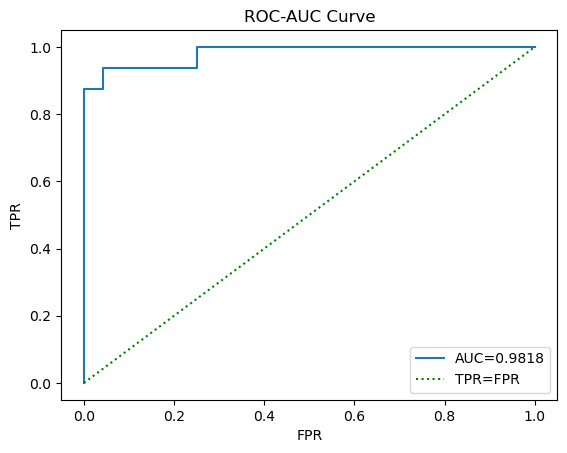

In [63]:
fpr,tpr,thresh = roc_curve(y_test1,ypred_proba[:,1])
auc_score = roc_auc_score(y_test1,ypred_proba[:,1])
plt.plot(fpr,tpr,label=f'AUC={round(auc_score,4)}')
plt.plot([0,1],[0,1],label='TPR=FPR',color='green',linestyle='dotted')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

In [64]:
print(len(thresh))
best_thresh = thresh[np.argmax(tpr*(1-fpr))]
print(best_thresh)

8
0.8827217964646151


In [65]:
ypred_best_thresh = np.where(ypred_proba[:,1]>best_thresh,1,0)

In [66]:
eval_model(y_test1,ypred_best_thresh)

[[23  1]
 [ 2 14]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.93      0.88      0.90        16

    accuracy                           0.93        40
   macro avg       0.93      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40



In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
lr_base = LogisticRegression(max_iter=10000)
scores = cross_val_score(lr_base,x,y,scoring='accuracy',cv = 5)
print(scores)
print('Mean Score',np.mean(scores))

[0.95 0.9  0.95 0.95 0.9 ]
Mean Score 0.93
